### Step 1: Load the Dataset


In [1]:
# import a libraries 
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



In [2]:
# Reading data from an Excel file
df = pd.read_excel('Online_Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# descriptive statistics of a DataFrame.
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,11476.725404
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,12352.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,14382.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16255.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,6778.330409


### Step 2: Clean the Data


In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

In [6]:
# Convert InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

C:\Users\hp\AppData\Local\Temp\ipykernel_204908\3127299091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])


In [7]:
print("\nDataset after cleaning:")
print(df_clean.head())


Dataset after cleaning:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Step 3: Perform Exploratory Data Analysis (EDA)


In [8]:
# Add a column for Total Price
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

C:\Users\hp\AppData\Local\Temp\ipykernel_204908\3842649675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [9]:
# Total sales
total_sales = df_clean['TotalPrice'].sum()
print(f"\nTotal Sales: {total_sales}")


Total Sales: 8300065.814000001


In [10]:
# Number of transactions
num_transactions = df_clean['InvoiceNo'].nunique()
print(f"Number of Transactions: {num_transactions}")

Number of Transactions: 22190


In [11]:
# Number of customers
num_customers = df_clean['CustomerID'].nunique()
print(f"Number of Customers: {num_customers}")



Number of Customers: 4372


In [12]:
# Top 5 countries by sales
top_countries = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Countries by Sales:")
print(top_countries)


Top 5 Countries by Sales:
Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Name: TotalPrice, dtype: float64


### Step 4: Visualize the Data


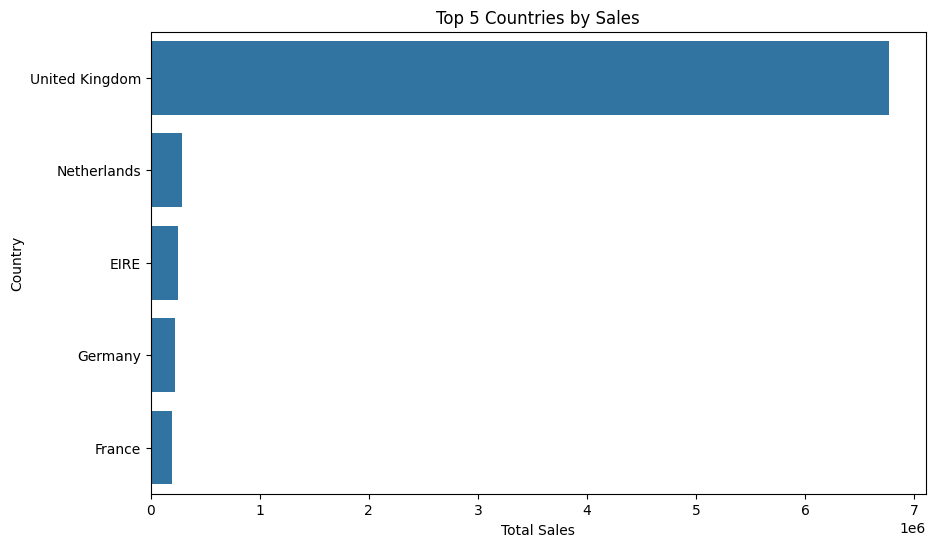

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 5 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_204908\288901683.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_clean['TotalPrice'].resample('M').sum()


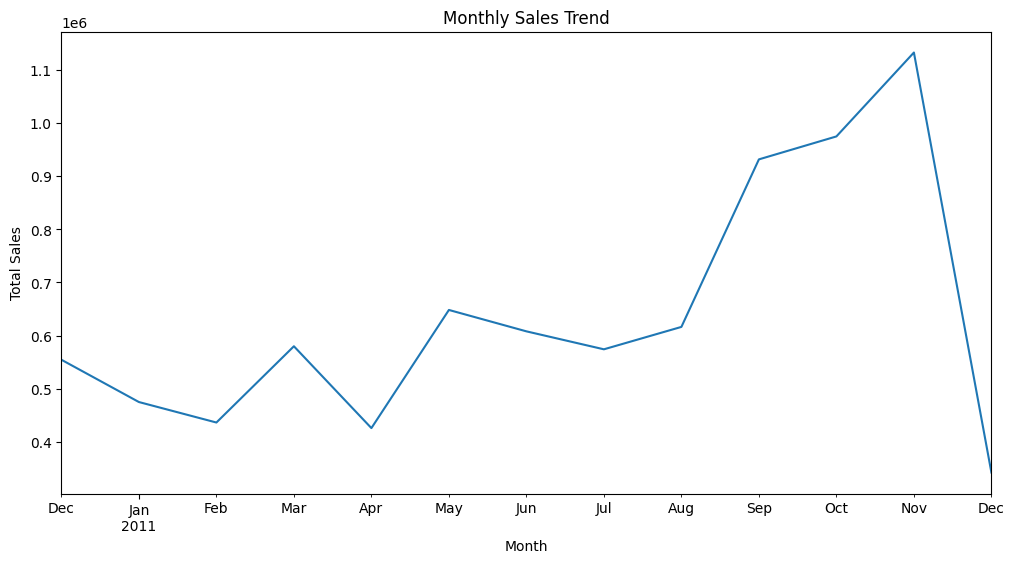

In [14]:
 # Monthly sales trend
df_clean.set_index('InvoiceDate', inplace=True)
monthly_sales = df_clean['TotalPrice'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

## Step 5: Transform the Data
#### 1. Normalize or standardize the data.

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your clean data is in a pandas DataFrame named 'df'
scaler_norm = MinMaxScaler(feature_range=(0, 1))
df_normalized = df.copy()
numerical_features = ['Quantity', 'UnitPrice']  # Adjust as needed
df_normalized[numerical_features] = scaler_norm.fit_transform(df_normalized[numerical_features])

# Print normalized DataFrame (optional)
# print(df_normalized)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler_std.fit_transform(df_standardized[numerical_features])

# Print standardized DataFrame (optional)
# print(df_standardized)


#### 2. Encoding Categorical Features:



In [18]:
from sklearn.preprocessing import LabelEncoder

# Assuming your clean data is in a pandas DataFrame named 'df'
encoder = LabelEncoder()
df_encoded = df.copy()

# Encode the 'Country' column using fit_transform
df_encoded['Country_Encoded'] = encoder.fit_transform(df['Country'])

# Print encoded DataFrame (optional)
print(df_encoded)



       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

In [47]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
TotalAmount          0
InvoiceYear          0
InvoiceMonth         0
InvoiceDay           0
InvoiceHour          0
DayOfWeek            0
IsWeekend            0
CustomerFrequency    0
dtype: int64


In [48]:
# Replace missing values in 'Description' with 'No Description'
df['Description'].fillna('No Description', inplace=True)

# Replace missing values in 'CustomerID' with -1
df['CustomerID'].fillna(-1, inplace=True)

# Check if missing values have been handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

#### No Missing values in each column:


C:\Users\hp\AppData\Local\Temp\ipykernel_204908\177885998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('No Description', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_204908\177885998.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Missing values after handling:
 InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
TotalAmount          0
InvoiceYear          0
InvoiceMonth         0
InvoiceDay           0
InvoiceHour          0
DayOfWeek            0
IsWeekend            0
CustomerFrequency    0
dtype: int64


## Step 5: Feature Engineering
1. Create new features based on existing ones.


In [49]:
# Create new features
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a reference date for calculating recency
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

In [50]:
# Calculate Recency, Frequency, and Monetary (RFM) values for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

In [51]:
# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the RFM dataframe
print(rfm.head())

   CustomerID  Recency  Frequency    Monetary
0        -1.0        1     135080  1447682.12
1     12346.0      326          2        0.00
2     12347.0        2        182     4310.00
3     12348.0       75         31     1797.24
4     12349.0       19         73     1757.55


In [52]:
# Calculate customer frequency
customer_frequency = df['CustomerID'].value_counts().to_dict()
df['CustomerFrequency'] = df['CustomerID'].map(customer_frequency)

# One-hot encode the Country feature
data = pd.get_dummies(df, columns=['Country'], prefix='Country')

# Display the first few rows of the updated dataset
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID  TotalAmount  InvoiceYear  \
0 2010-12-01 08:26:00       2.55     17850.0        15.30         2010   
1 2010-12-01 08:26:00       3.39     17850.0        20.34         2010   
2 2010-12-01 08:26:00       2.75     17850.0        22.00         2010   
3 2010-12-01 08:26:00       3.39     17850.0        20.34         2010   
4 2010-12-01 08:26:00       3.39     17850.0        20.34         2010   

   InvoiceMonth  ...  Country_RSA  Country_Saudi Arabia  Country_Singapore  \
0            12  ...        False           

#### 2. Perform feature selection to identify the most relevant features.

In [53]:
# Feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming we have some target variable y for classification
# For demonstration purposes, we'll create a dummy target variable
data['Target'] = (data['Quantity'] > 10).astype(int)  # Dummy target variable
y = data['Target']
X = data.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Target'], axis=1)


In [54]:
# Use a RandomForestClassifier to find feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Select features based on feature importance
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

selected_features = X.columns[model.get_support()]

print("Selected Features: ", selected_features)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features:  Index(['Quantity', 'UnitPrice', 'TotalAmount', 'CustomerFrequency'], dtype='object')


## step 6: Scaling

In [55]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the RFM features
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert scaled features back to a dataframe
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Display the scaled RFM dataframe
print(rfm_scaled_df.head())


    Recency  Frequency   Monetary
0 -0.903471  65.696532  61.892754
1  2.322278  -0.059351  -0.095447
2 -0.893545   0.028273   0.089103
3 -0.168992  -0.045234  -0.018491
4 -0.724814  -0.024789  -0.020190


## Step 4: K-means Clustering
Determine the optimal number of clusters using the Elbow method and apply K-means clustering.

In [56]:
# Determine the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    sse.append(kmeans.inertia_)

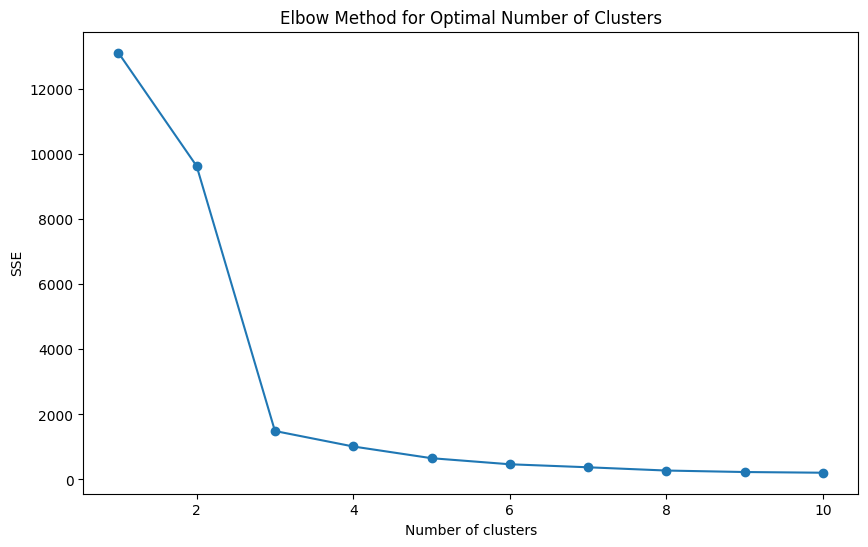

In [57]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [58]:
# Apply K-means with the optimal number of clusters (let's assume it's 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_scaled_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Add the cluster labels to the original RFM dataframe
rfm['Cluster'] = rfm_scaled_df['Cluster']

# Display the first few rows with cluster labels
print(rfm.head())

   CustomerID  Recency  Frequency    Monetary  Cluster
0        -1.0        1     135080  1447682.12        2
1     12346.0      326          2        0.00        1
2     12347.0        2        182     4310.00        0
3     12348.0       75         31     1797.24        0
4     12349.0       19         73     1757.55        0


### Evaluation and Interpretation
Analyze the clusters to understand the customer segments.

We analyze the clusters to understand different customer segments based on their purchasing behavior.
This approach will help you identify distinct customer segments in your online retail dataset.

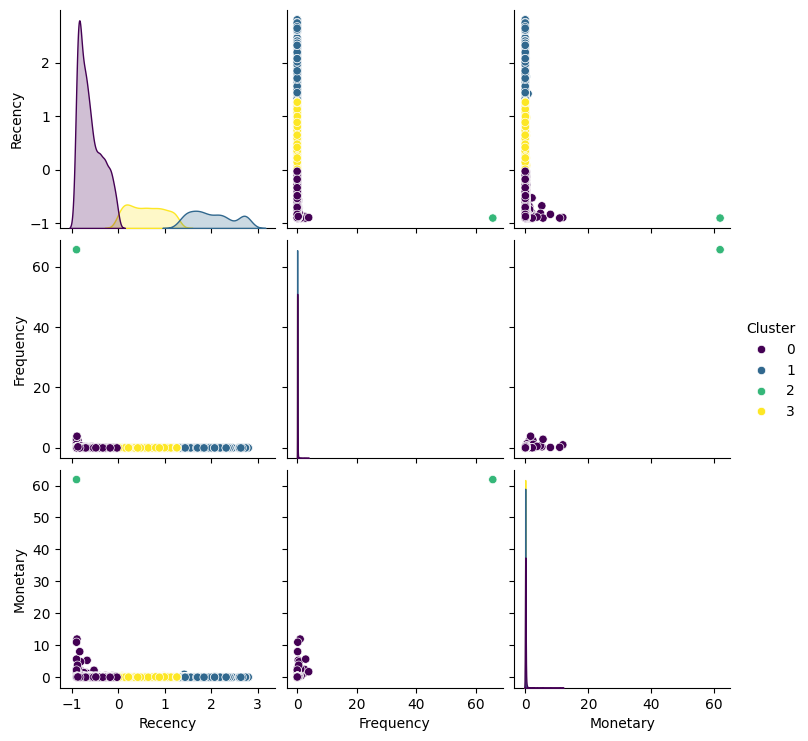

   Cluster    CustomerID     Recency      Frequency      Monetary
0        0  15286.918891   31.039357     122.756331  2.555363e+03
1        1  15300.597792  295.372240      23.402208  4.049034e+02
2        2     -1.000000    1.000000  135080.000000  1.447682e+06
3        3  15344.650735  152.533088      40.806373  7.066001e+02


In [59]:
# Plot the clusters
sns.pairplot(rfm_scaled_df, hue='Cluster', palette='viridis')
plt.show()

# Calculate the mean RFM values for each cluster
cluster_analysis = rfm.groupby('Cluster').mean().reset_index()

# Display the cluster analysis
print(cluster_analysis)
